In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('prepared_data_book.csv')
df.head(5)

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4
1,2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.63,2.53,7929,Others,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3
2,3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,8.86,5.32,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4
3,4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,3.33,2.00,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4
4,5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,5.70,3.42,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4


Điền thiếu

In [3]:
df['discount'].fillna(0, inplace=True)

Thống kê mô tả của các trường dữ liệu số

In [4]:
num_cols = ['original_price', 'current_price', 'quantity', 'n_review', 'avg_rating', 'pages', 'discount']
df[num_cols].describe()

,original_price,current_price,quantity,n_review,avg_rating,pages,discount
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,6.692586,4.861330,2805.490662,328.848896,4.596491,347.202603,0.272264
std,5.367041,4.298247,16796.190782,730.947525,1.129788,180.553555,0.135319
min,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000
25%,3.760000,2.530000,180.500000,16.000000,4.800000,220.000000,0.200000
50%,5.440000,3.750000,608.000000,75.000000,4.800000,332.000000,0.300000
75%,7.970000,5.760000,2376.000000,304.500000,5.000000,456.000000,0.370000
max,65.400000,50.630000,671121.000000,11481.000000,5.000000,2004.000000,0.800000


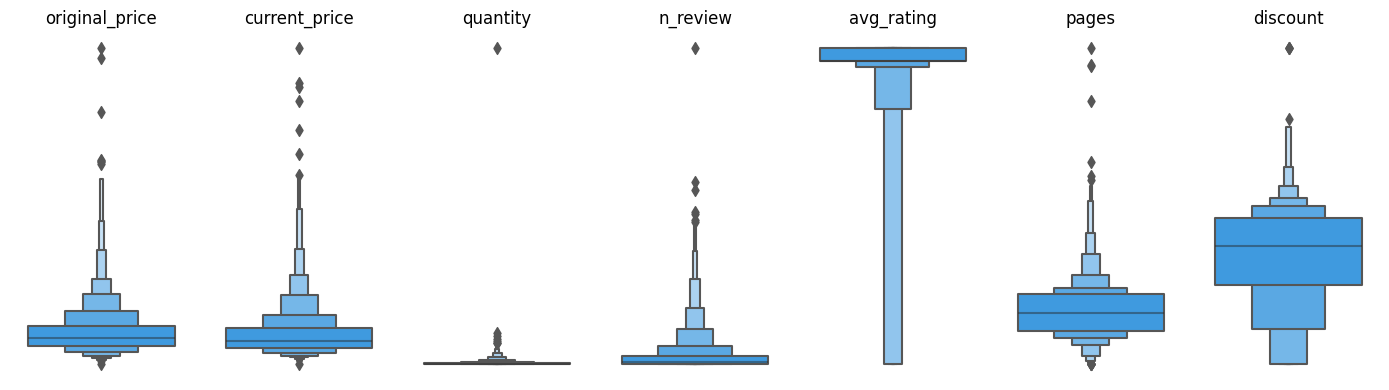

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(14, 4))  

for i, col in enumerate(num_cols):
    sns.despine(left=True, right=True, bottom=True, top=True)
    sns.boxenplot(data=df[col], ax=axs[i], color='#249efa')
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

Thay thế giá trị lỗi

In [6]:
replace_index = df[df['quantity'] == df['quantity'].max()].index[0]
review_rate = df[df.index != replace_index]['n_review'].mean() / df[df.index != replace_index]['quantity'].mean()
df.loc[replace_index, 'quantity'] = int(df.loc[replace_index, 'n_review'] / review_rate)

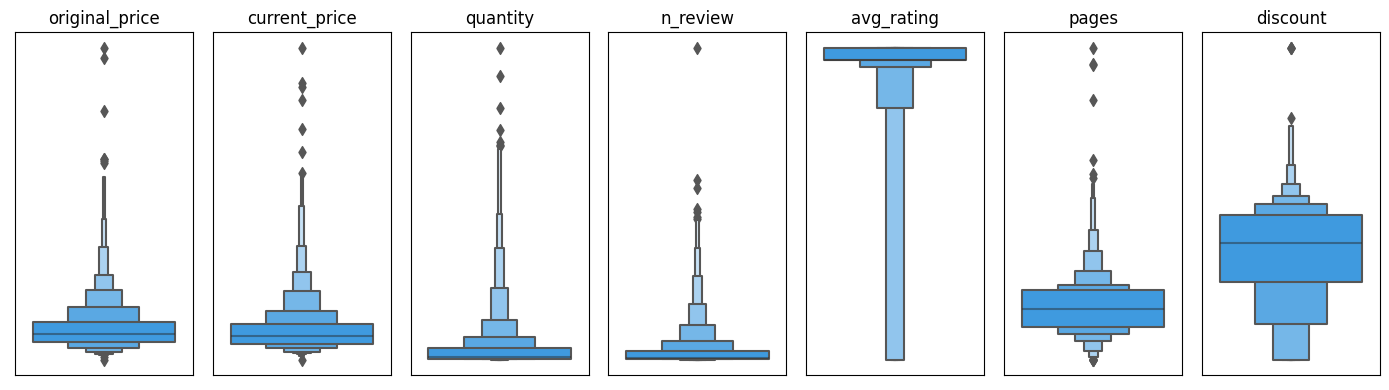

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(14, 4))  

for i, col in enumerate(num_cols):
    sns.boxenplot(data=df[col],  ax=axs[i], color='#249efa')
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

# Trực quan hóa

## Top 10 thể loại sách phổ biến nhất

In [8]:
replace_index = df[df['quantity'] == df['quantity'].max()].index[0]
review_rate = df[df.index != replace_index]['n_review'].mean() \
              / df[df.index != replace_index]['quantity'].mean()
df.loc[replace_index, 'quantity'] = int(df.loc[replace_index, 'n_review'] / review_rate)

In [9]:
cate_cnt = df[['category', 'quantity']].groupby('category').sum()
cate_cnt['count'] = df['category'].value_counts()
cate_cnt = cate_cnt.drop('Others')

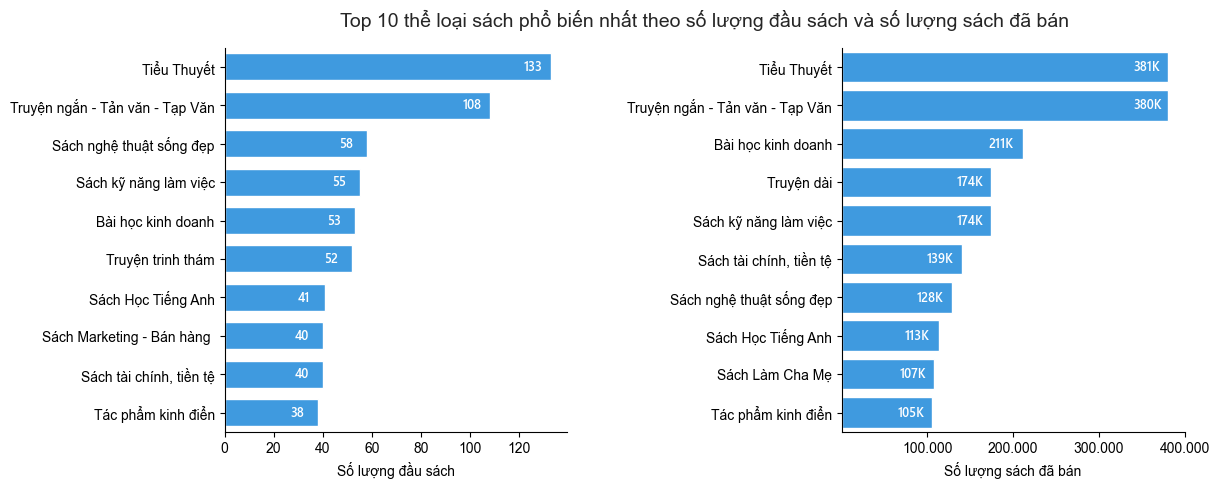

In [10]:
n_top = 10
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(12)

sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine(right=True)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.8, hspace=0.4)

df_draw = cate_cnt.sort_values('count', ascending=False)[:n_top].reset_index()
sns.barplot(x='count', y='category', data=df_draw, ax=axs[0], color='#249efa', width=0.7)

df_draw = cate_cnt.sort_values('quantity', ascending=False)[:n_top].reset_index()
df_draw['quantity_k'] = df_draw['quantity'] / 1000
sns.barplot(x='quantity_k', y='category', data=df_draw, ax=axs[1], color='#249efa')

axs[0].bar_label(axs[0].containers[0], padding=-20, color='white', 
                 fontsize=9, fontweight=600, fontfamily='segoe ui')
axs[1].bar_label(axs[1].containers[0], fmt='%dK', padding=-25, color='white', 
                 fontsize=9, fontweight=600, fontfamily='segoe ui')

fig.suptitle(f'Top {n_top} thể loại sách phổ biến nhất theo số lượng đầu sách và số lượng sách đã bán', fontsize=14)
axs[0].set_xlabel('Số lượng đầu sách')
axs[0].set_ylabel('')

axs[1].set_xlabel('Số lượng sách đã bán')
axs[1].set_ylabel('')
axs[1].set_xticks([100, 200, 300, 400], ['100.000', '200.000', '300.000', '400.000'])

plt.show()

Nhận xét:
> Các thể loại trong top 10 không có sự thay đổi nhiều xét trên 2 tiêu chí. Biểu đồ cho thấy các thể loại văn học, kỹ năng và phát triển bản thân chiếm ưu thế, đang được yêu thích và thu hút độc giả.

> Biểu đồ này có thể giúp người xem nhận ra những thể loại sách phổ biến nhất trên Tiki hiện nay. Thông tin này có thể hữu ích cho người đọc khi muốn khám phá thêm những cuốn sách trong những lĩnh vực mà họ yêu thích hoặc muốn mở rộng kiến thức của mình trong những lĩnh vực khác. Ngoài ra, biểu đồ này cũng có thể giúp người đọc có được cái nhìn tổng quan về sự đa dạng và phong phú của sách đang được ưa chuộng. Điều này có thể giúp người đọc mở rộng tầm nhìn về những tác phẩm văn học và những lĩnh vực khác trong sách đọc.

## Giá gốc và giá bán

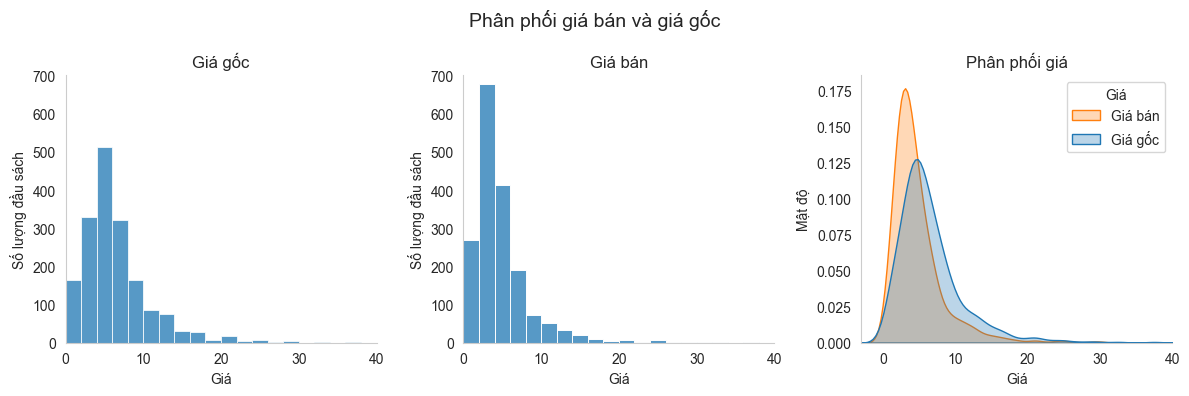

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
sns.despine(right=True)
sns.histplot(data=df, x='original_price', ax=axs[0], binwidth=2)
axs[0].set_xlim([0, 40])
axs[0].set_ylim([0, 700])
axs[0].set_title('Giá gốc')
axs[0].set_xlabel('Giá')
axs[0].set_ylabel('Số lượng đầu sách')

sns.histplot(data=df, x='current_price', ax=axs[1], binwidth=2)
axs[1].set_xlim([0, 40])
axs[1].set_ylim([0, 700])
axs[1].set_title('Giá bán')
axs[1].set_xlabel('Giá')
axs[1].set_ylabel('Số lượng đầu sách')

df_draw = pd.melt(df, value_vars=['original_price', 'current_price'], var_name='type',
                  value_name='price')
sns.kdeplot(data=df_draw, x='price', hue='type', ax=axs[2], 
            fill=True, alpha=.3, common_norm=False, )

axs[2].set_xlim([-3, 40])
axs[2].set_title('Phân phối giá')
axs[2].set_xlabel('Giá')
axs[2].set_ylabel('Mật độ')

plt.legend(title='Giá', loc='best', labels=['Giá bán', 'Giá gốc'])
fig.suptitle('Phân phối giá bán và giá gốc', fontsize=14)
plt.tight_layout()
plt.show()

Nhận xét:
- Phần lớn giá bán và giá gốc dưới 10.
- Giá bán có đỉnh là 4-6, so với giá bán là 2-4.



Quan sát 3 biểu đồ, chũng ta có thể thấy giá bán có xu hướng rẻ hơn so với giá gốc. Để kiểm chứng điều này, chúng ta cần tiến hành kiểm định các giả thuyết sau:

\begin{cases}
H_0: \text{``Giá bán không thấp hơn giá không"} \\
H_1: \text{``Giá bán thấp hơn giá gốc"}
\end{cases}

Với mức ý nghĩa $\alpha$:

- Nếu $p-\text{value} \le \alpha$ thì bác bỏ giả thuyết $H_0$, chấp nhận $H_1$ với độ tin cậy $100(1 − \alpha)\%$.

- Nếu $p-\text{value} > \alpha$, chưa đủ cơ sở bác bỏ giả thuyết $H_0$ với mức ý nghĩa $\alpha$.

In [12]:
from scipy import stats
t_statistic, p_value = stats.ttest_ind(df['current_price'], df['original_price'], alternative='less')

print("t-statistic = ", t_statistic)
print("p-value = ", p_value)

alpha = 0.05

if p_value <= alpha:
    print(f"Bác bỏ giả thuyết H_0, chấp nhận H_1 với độ tin cậy {100*(1 - alpha)}%")
else:
    print(f"Chưa đủ cơ sở bác bỏ giả thuyết H_0 với mức ý nghĩa {alpha}")

t-statistic =  -11.1951124425312
p-value =  6.494910615386626e-29
Bác bỏ giả thuyết H_0, chấp nhận H_1 với độ tin cậy 95.0%
